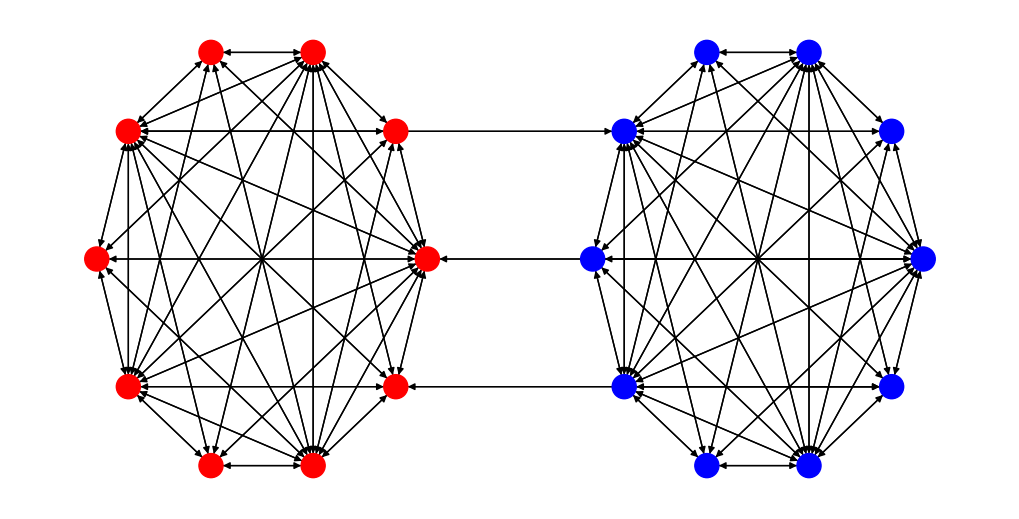

In [9]:
import matplotlib.pyplot as plt
import networkx as nx

# Create a new directed graph
G = nx.DiGraph()

# Add nodes for two clusters (filter bubbles)
red_nodes = [f'R{i}' for i in range(1, 11)]
blue_nodes = [f'B{i}' for i in range(1, 11)]

G.add_nodes_from(red_nodes, color='red')
G.add_nodes_from(blue_nodes, color='blue')

# Add edges within clusters (dense connections)
for i in range(len(red_nodes)):
    for j in range(i+1, len(red_nodes)):
        if i % 2 == 0 or j % 2 == 0:  # Dense but not fully connected
            G.add_edge(red_nodes[i], red_nodes[j])
            G.add_edge(red_nodes[j], red_nodes[i])

for i in range(len(blue_nodes)):
    for j in range(i+1, len(blue_nodes)):
        if i % 2 == 0 or j % 2 == 0:  # Dense but not fully connected
            G.add_edge(blue_nodes[i], blue_nodes[j])
            G.add_edge(blue_nodes[j], blue_nodes[i])

# Add few edges between clusters (sparse connections)
inter_cluster_edges = [('R1', 'B1'), ('R5', 'B5'), ('R10', 'B10')]
for edge in inter_cluster_edges:
    G.add_edge(*edge)
    G.add_edge(edge[1], edge[0])

# Create positions for nodes in a circular layout for each cluster
pos_red = nx.circular_layout(red_nodes)
pos_blue = nx.circular_layout(blue_nodes)
pos = {**pos_red, **pos_blue}

# Offset the positions of the blue cluster to avoid overlap
for key in pos_blue:
    pos[key][0] += 3  # Shift right by 3 units

# Separate colors for drawing
colors = [G.nodes[node]['color'] for node in G.nodes()]

plt.figure(figsize=(10, 5))
nx.draw(G, pos, with_labels=False, node_color=colors, edge_color='black', node_size=300, font_size=8, font_color='white', arrows=True)

# Draw the graph title
#plt.title('Filter Bubbles in a Social Network')

plt.show()



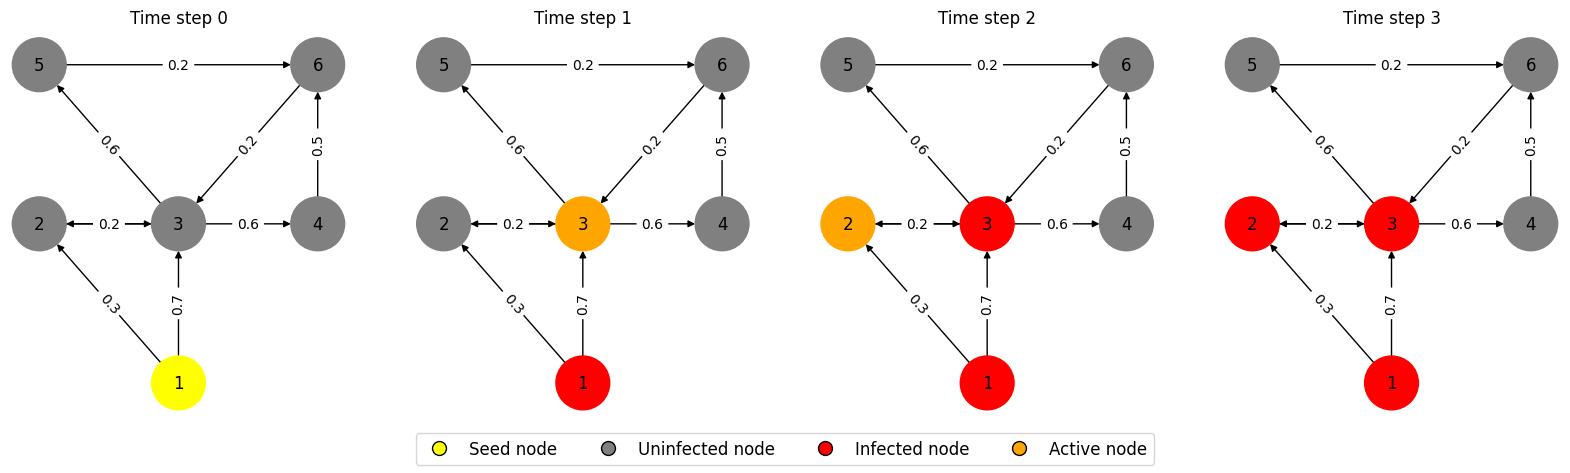

In [14]:
import networkx as nx
import matplotlib.pyplot as plt

# Define the graph with nodes and weighted edges
G = nx.DiGraph()
edges = [(1, 2, 0.3), (1, 3, 0.7), (2, 3, 0.6), (3, 2, 0.2), (3, 4, 0.6), (3, 5, 0.6), (4, 6, 0.5), (5, 6, 0.2), (6, 3, 0.2)]
G.add_weighted_edges_from(edges)

# Define positions for a visually appealing layout
pos = {1: (0, 0), 2: (-1, 1), 3: (0, 1), 4: (1, 1), 5: (-1, 2), 6: (1, 2)}

# Define node colors for each time step with updated colors
node_colors = [
    {1: 'yellow', 2: 'grey', 3: 'grey', 4: 'grey', 5: 'grey', 6: 'grey'},
    {1: 'red', 2: 'grey', 3: 'orange', 4: 'grey', 5: 'grey', 6: 'grey'},
    {1: 'red', 2: 'orange', 3: 'red', 4: 'grey', 5: 'grey', 6: 'grey'},
    {1: 'red', 2: 'red', 3: 'red', 4: 'grey', 5: 'grey', 6: 'grey'}
]

# Plot the graph for each time step with updated node colors and additional labels
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
time_steps = ['Time step 0', 'Time step 1', 'Time step 2', 'Time step 3']

for i, ax in enumerate(axes):
    ax.set_title(time_steps[i])
    nx.draw(G, pos, ax=ax, with_labels=True, node_color=[node_colors[i][n] for n in G.nodes], 
            edge_color='black', node_size=1500, font_size=12, font_color='black')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, ax=ax, font_size=10)

# Adding a legend
from matplotlib.lines import Line2D

legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Seed node', markersize=10, markerfacecolor='yellow', markeredgecolor='black'),
    Line2D([0], [0], marker='o', color='w', label='Uninfected node', markersize=10, markerfacecolor='grey', markeredgecolor='black'),
    Line2D([0], [0], marker='o', color='w', label='Infected node', markersize=10, markerfacecolor='red', markeredgecolor='black'),
    Line2D([0], [0], marker='o', color='w', label='Active node', markersize=10, markerfacecolor='orange', markeredgecolor='black')
]

fig.legend(handles=legend_elements, loc='lower center', ncol=4, fontsize=12)

#plt.tight_layout()
plt.show()



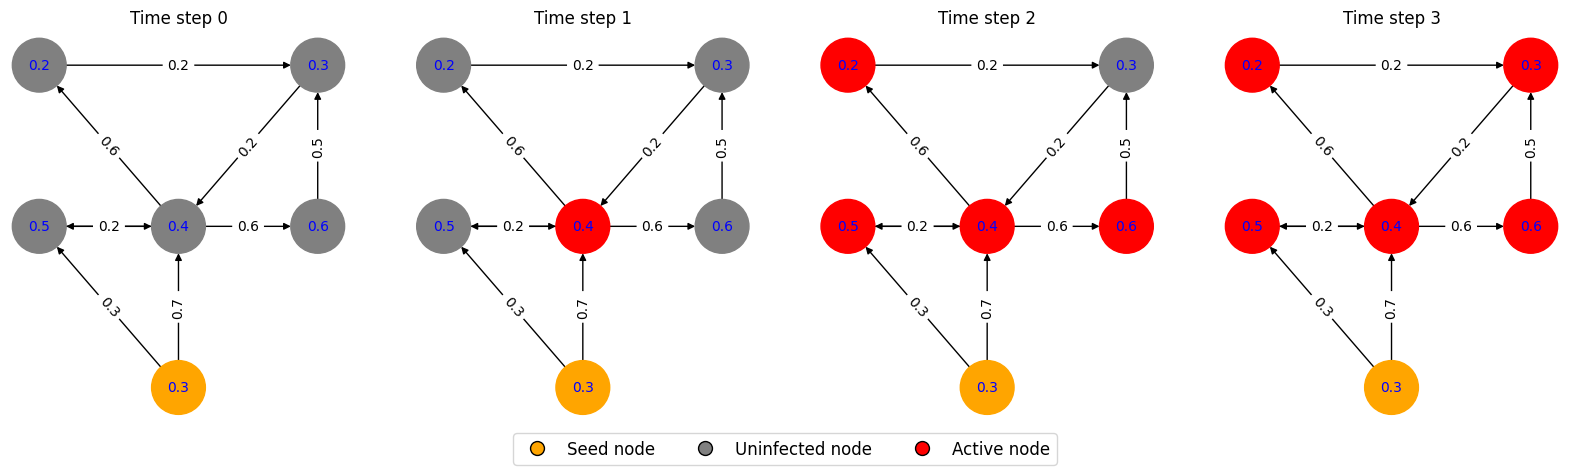

In [12]:
# Define threshold values for each node (example values for demonstration)
thresholds = {1: 0.3, 2: 0.5, 3: 0.4, 4: 0.6, 5: 0.2, 6: 0.3}

# Function to check if a node should become active
def should_become_active(node, active_nodes):
    influence_sum = sum(G[u][v]['weight'] for u, v in G.in_edges(node) if u in active_nodes)
    return influence_sum >= thresholds[node]

# Simulate the Linear Threshold Model over 4 time steps
time_steps = [initial_active_nodes.copy()]
active_nodes = initial_active_nodes.copy()

for t in range(3):  # 3 more time steps
    new_active_nodes = active_nodes.copy()
    for node in G.nodes:
        if node not in active_nodes and should_become_active(node, active_nodes):
            new_active_nodes.append(node)
    active_nodes = new_active_nodes
    time_steps.append(active_nodes.copy())

# Define node colors for each time step with updated colors for Linear Threshold Model
node_colors_ltm = []
for active_nodes in time_steps:
    colors = {n: 'red' if n in active_nodes else 'grey' for n in G.nodes}
    for n in initial_active_nodes:
        if n in colors:
            colors[n] = 'orange'
    node_colors_ltm.append(colors)

# Plot the graph for each time step with updated node colors and threshold labels
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
time_steps_labels = ['Time step 0', 'Time step 1', 'Time step 2', 'Time step 3']


for i, ax in enumerate(axes):
    ax.set_title(time_steps_labels[i])
    nx.draw(G, pos, ax=ax, with_labels=False, node_color=[node_colors_ltm[i][n] for n in G.nodes], 
            edge_color='black', node_size=1500, font_size=12, font_color='black')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, ax=ax, font_size=10)
    # Adding threshold labels without node numbering
    threshold_labels = {node: f"{thresholds[node]}" for node in G.nodes}
    nx.draw_networkx_labels(G, pos, labels=threshold_labels, ax=ax, font_size=10, font_color='blue')

# Adding a legend with extra space at the bottom
fig.subplots_adjust(bottom=0.1)

legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Seed node', markersize=10, markerfacecolor='orange', markeredgecolor='black'),
    Line2D([0], [0], marker='o', color='w', label='Uninfected node', markersize=10, markerfacecolor='grey', markeredgecolor='black'),
    Line2D([0], [0], marker='o', color='w', label='Active node', markersize=10, markerfacecolor='red', markeredgecolor='black')
]

fig.legend(handles=legend_elements, loc='lower center', ncol=3, fontsize=12)

#plt.tight_layout()
plt.show()


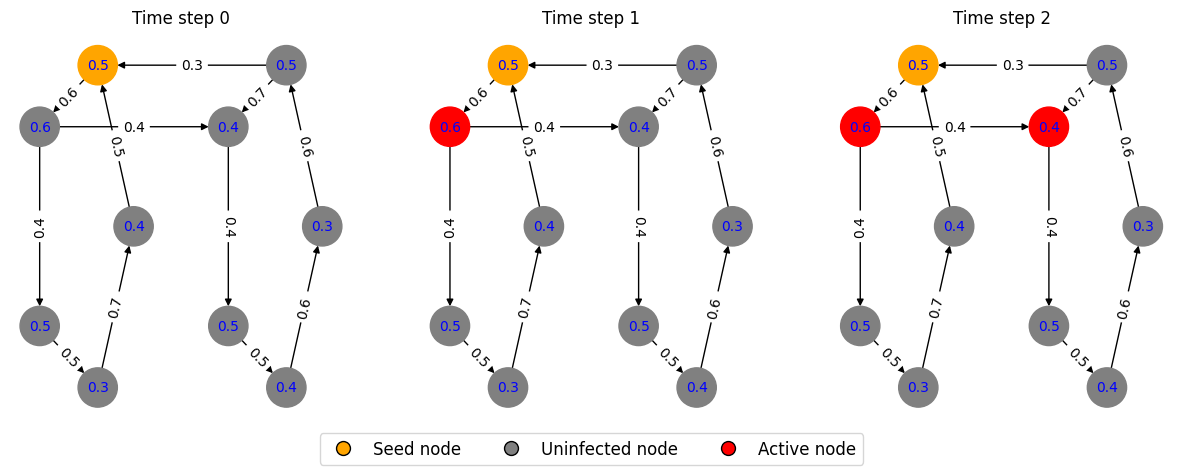

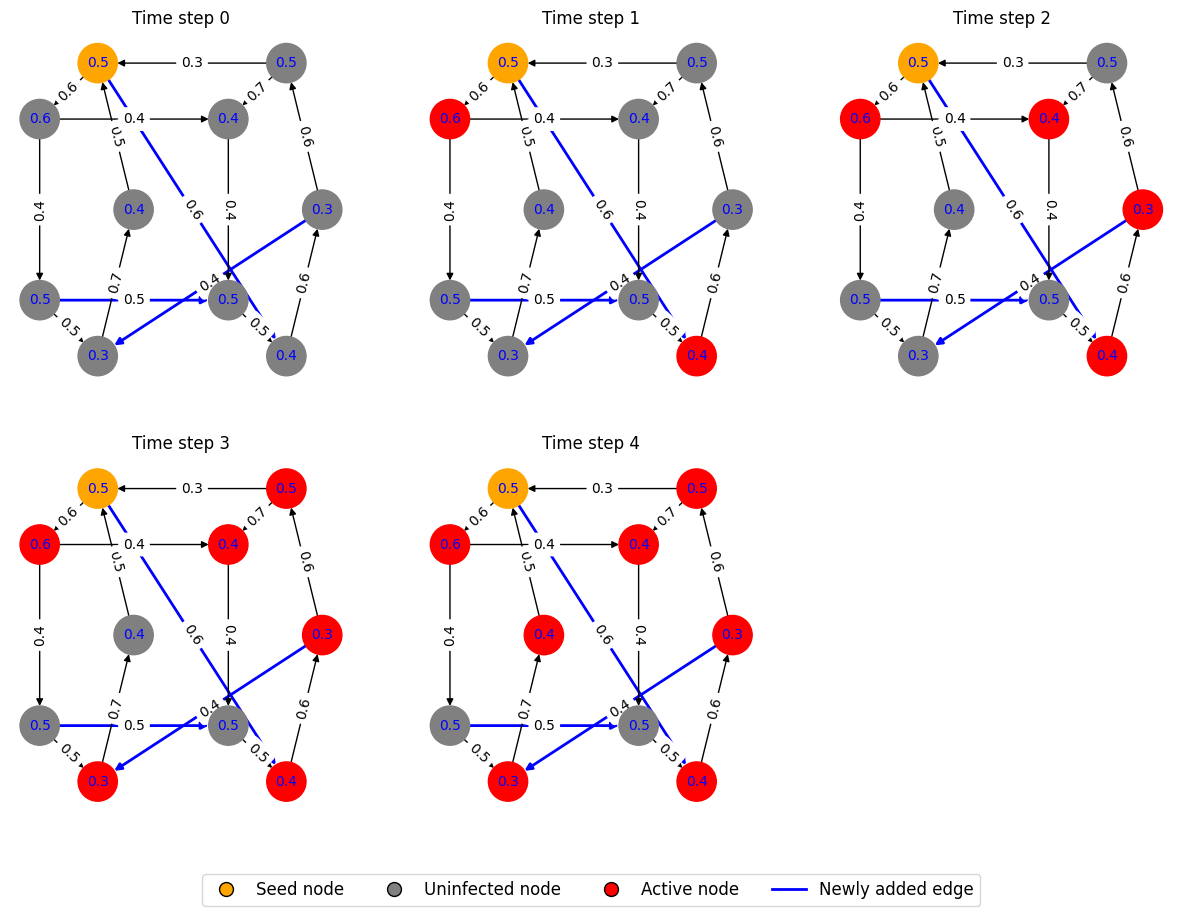

In [56]:
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib.lines import Line2D
import math
import numpy as np

def circular_layout_with_radius(nodes, center=(0, 0), min_distance=1.0):
    """Generate a circular layout with a specified minimal distance between nodes."""
    num_nodes = len(nodes)
    radius = min_distance / (2 * np.sin(np.pi / num_nodes))  # Calculate radius based on minimal distance
    angle_step = 2 * np.pi / num_nodes
    pos = {}

    for i, node in enumerate(nodes):
        angle = i * angle_step
        x = center[0] + radius * np.cos(angle)
        y = center[1] + radius * np.sin(angle)
        pos[node] = (x, y)

    return pos

# Create initial graph with two well-connected clusters and minimal connections between them
G = nx.DiGraph()

# Cluster 1
nodes_cluster_1 = range(1, 6)
edges_cluster_1 = [(1, 2, 0.5), (2, 3, 0.6), (3, 4, 0.4), (4, 5, 0.5), (5, 1, 0.7)]
G.add_weighted_edges_from(edges_cluster_1)

# Cluster 2
nodes_cluster_2 = range(6, 11)
edges_cluster_2 = [(6, 7, 0.6), (7, 8, 0.7), (8, 9, 0.4), (9, 10, 0.5), (10, 6, 0.6)]
G.add_weighted_edges_from(edges_cluster_2)

# Minimal connections between clusters
G.add_weighted_edges_from([(3, 8, 0.4), (7, 2, 0.3)])

# Define the seed node (choosing a different seed node)
seed_node = 2  # New seed node
initial_active_nodes = [seed_node]

# Set minimal distance
min_distance = 2.2

# Position nodes in two circles with minimal distance
pos_cluster_1 = circular_layout_with_radius(nodes_cluster_1, center=(0, 0), min_distance=min_distance)
pos_cluster_2 = circular_layout_with_radius(nodes_cluster_2, center=(6.8, 0), min_distance=min_distance)

pos = {**pos_cluster_1, **pos_cluster_2}

# Define threshold values for each node
thresholds = {1: 0.4, 2: 0.5, 3: 0.6, 4: 0.5, 5: 0.3, 6: 0.3, 7: 0.5, 8: 0.4, 9: 0.5, 10: 0.4}

# Function to check if a node should become active in the Linear Threshold Model
def should_become_active(node, active_nodes):
    influence_sum = sum(G[u][v]['weight'] for u, v in G.in_edges(node) if u in active_nodes)
    return influence_sum >= thresholds[node]

# Simulate the Linear Threshold Model until no new nodes get activated
def linear_threshold_model(G, initial_active_nodes):
    time_steps = [initial_active_nodes.copy()]
    active_nodes = initial_active_nodes.copy()

    while True:
        new_active_nodes = active_nodes.copy()
        for node in G.nodes:
            if node not in active_nodes and should_become_active(node, active_nodes):
                new_active_nodes.append(node)
        if set(new_active_nodes) == set(active_nodes):
            break
        active_nodes = new_active_nodes
        time_steps.append(active_nodes.copy())

    return time_steps

# Simulate the Linear Threshold Model before adding new links
steps_ltm_before = linear_threshold_model(G, initial_active_nodes)

# Copy the graph to ensure we have a version before adding new edges
G_copy = G.copy()

# Add new links to reduce polarization
new_edges_ltm = [(4, 9, 0.5), (6, 5, 0.4), (2, 10, 0.6)]
G.add_weighted_edges_from(new_edges_ltm)

# Simulate the Linear Threshold Model after adding new links
steps_ltm_after = linear_threshold_model(G, initial_active_nodes)

# Define node colors for each time step with updated colors for Linear Threshold Model
node_colors_ltm_before = []
for active_nodes in steps_ltm_before:
    colors = {n: 'red' if n in active_nodes else 'grey' for n in G_copy.nodes}
    for n in initial_active_nodes:
        if n in colors:
            colors[n] = 'orange'
    node_colors_ltm_before.append(colors)

node_colors_ltm_after = []
for active_nodes in steps_ltm_after:
    colors = {n: 'red' if n in active_nodes else 'grey' for n in G.nodes}
    for n in initial_active_nodes:
        if n in colors:
            colors[n] = 'orange'
    node_colors_ltm_after.append(colors)

# Plot the graph for each time step with updated node colors and threshold labels
def plot_graphs(G, steps, new_edges, pos, show_new_edges_legend=False):
    num_steps = len(steps)
    num_cols = 3  # Number of columns per row
    num_rows = math.ceil(num_steps / num_cols)
    
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
    axes = axes.flatten()  # Flatten in case we have a single row to make indexing easier
    time_steps_labels = [f'Time step {i}' for i in range(num_steps)]

    # Define edge labels
    edge_labels = nx.get_edge_attributes(G, 'weight')

    for i, ax in enumerate(axes):
        if i < num_steps:
            ax.set_title(f"{time_steps_labels[i]}")
            node_color = ['orange' if n in initial_active_nodes else 'red' if n in steps[min(i, len(steps)-1)] else 'grey' for n in G.nodes]

            # Ensure the new edges are tuples without data attributes
            new_edges_set = {(u, v) for u, v, _ in new_edges}

            edge_color = ['blue' if (u, v) in new_edges_set else 'black' for u, v in G.edges()]
            edge_width = [2.0 if (u, v) in new_edges_set else 1.0 for u, v in G.edges()]

            nx.draw(G, pos, ax=ax, with_labels=False, node_color=node_color, edge_color=edge_color, width=edge_width, node_size=800, font_size=12, font_color='black')
            nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, ax=ax, font_size=10)
            nx.draw_networkx_labels(G, pos, labels={node: f"{thresholds[node]}" for node in G.nodes}, ax=ax, font_size=10, font_color='blue')
        else:
            ax.axis('off')  # Hide any unused subplots

    # Adding a legend with extra space at the bottom
    fig.subplots_adjust(bottom=0.1)

    legend_elements = [
        Line2D([0], [0], marker='o', color='w', label='Seed node', markersize=10, markerfacecolor='orange', markeredgecolor='black'),
        Line2D([0], [0], marker='o', color='w', label='Uninfected node', markersize=10, markerfacecolor='grey', markeredgecolor='black'),
        Line2D([0], [0], marker='o', color='w', label='Active node', markersize=10, markerfacecolor='red', markeredgecolor='black'),
    ]

    if show_new_edges_legend:
        legend_elements.append(
            Line2D([0], [0], color='blue', lw=2, label='Newly added edge')
        )

    fig.legend(handles=legend_elements, loc='lower center', ncol=4, fontsize=12)

    plt.show()

# Plot the information spread before adding new links for the LTM model
plot_graphs(G_copy, steps_ltm_before, [], pos)

# Plot the information spread after adding new links for the LTM model
plot_graphs(G, steps_ltm_after, new_edges_ltm, pos, show_new_edges_legend=True)
